## Introduction:
The Titanic dataset encapsulates the demographic details of passengers on the ill-fated maiden voyage of RMS Titanic in 1912. This Exploratory Data Analysis (EDA) endeavors to uncover patterns and insights within the dataset, shedding light on the factors influencing survival rates. By delving into passenger profiles, we aim to discern how variables such as class, gender, age, and family connections played a role in determining the likelihood of survival. Through statistical analysis and visualizations, we seek to capture a nuanced understanding of this historic event, paying homage to the individuals who were part of the tragedy and exploring the enduring significance of the Titanic disaster.

## Loading Data and Libraries

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv("data/train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Exploration and Cleaning


In [13]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

In [39]:
print(df["Survived"].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


- Only 38% of the passengers survived.

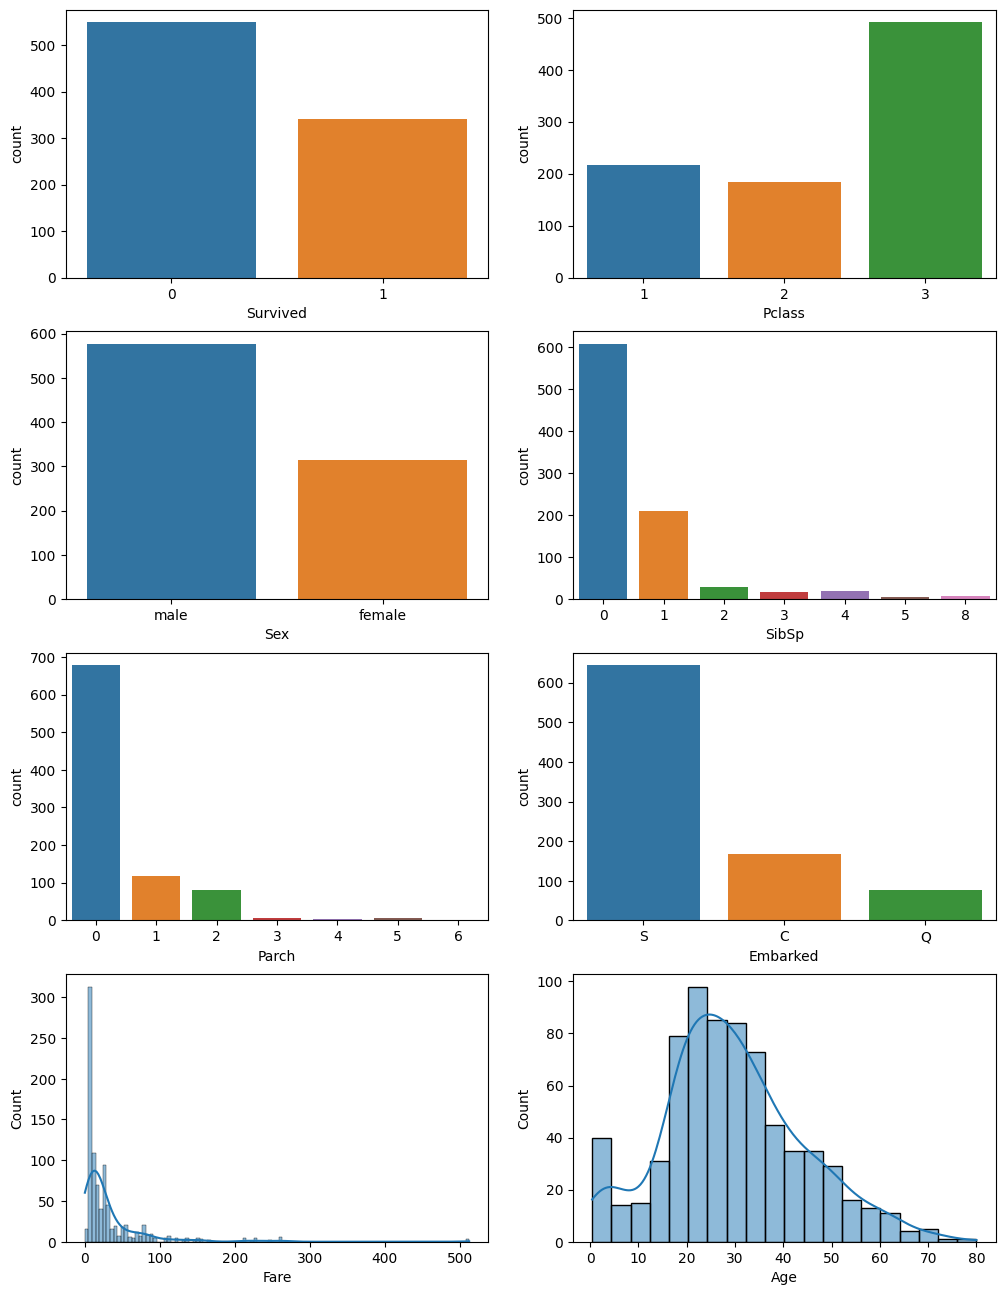

In [36]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(cols):
    if column in ["Fare", "Age"]:
        sns.histplot(df[column].dropna(), kde=True, ax=axes[i])
    else:
        sns.countplot(x=column, data=df, ax=axes[i])

**Passenger Class (Pclass):**
- The majority of passengers were in the 3rd class, indicating a higher proportion of individuals in the lower socio-economic class.
- This aligns with the observation that most people paid a lower fare, as fares were generally lower in the 3rd class.

**Gender (Sex):**
- Most passengers were male, highlighting a male-dominated composition on the Titanic.

**Embarkation Points (Embarked):**
- The majority of passengers embarked from Southampton (S), indicating that Southampton was a primary departure point.

**Traveling Alone (SibSp and Parch):**
- Most passengers traveled alone or without immediate family members:
  - The majority had no siblings or spouses (SibSp).
  - The majority had no parents or children (Parch).

**Age Distribution:**
- The age distribution suggests that a significant portion of passengers belonged to the 20-30 age group, indicating a relatively young population on board.


### Bivariate Analysis